Movilidad de personas en chile
=================


Importo librerías útiles

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cm as cm

import scipy 
from scipy import stats
import datetime as dt
from datetime import timedelta  
import urllib.request  # importar archivos web
from lifelines import NelsonAalenFitter # modelamiento survival

import wget

# para tratar de poner espanol
from datetime import date, datetime, time
from babel.dates import format_date, format_datetime, format_time, format_timedelta, Locale
import locale                                    # para tratar de poner espanol
locale.setlocale(locale.LC_ALL,'es_CL.utf8')  

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

leo la base de datos desde google y la guardo

In [2]:
print('Bajando')
# desde esta dirección
url = 'https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv?cachebust=b8b0c30cbee5f341'

# le pongo nombre al archivo
hoy     = datetime.now().strftime('%Y-%m-%d')
nombre  = './BDs/Movilidad' + hoy + '.csv'

# la bajo
wget.download(url, nombre)

Bajando


'./BDs/Movilidad2020-06-10.csv'

listo todos los archivos disponibles para trabajar de los que he conseguido

In [3]:
# listo los archivos disponibles que he bajado
import os
lista_archivos = []
for dirname, dirnames, filenames in os.walk('./BDs/'):
    for filename in filenames:
        lista_archivos.append(os.path.join(dirname, filename))
archivos = lista_archivos
archivos

['./BDs/.~lock.Movilidad2020-06-10.csv#',
 './BDs/Movilidad2020-06-10.csv',
 './BDs/Movilidad2020-06-07.csv',
 './BDs/Movilidad2020-06-05.csv',
 './BDs/Movilidad2020-06-08.csv']

leo la última base de datos, supongo es la más actualizada

In [4]:
BD = pd.read_csv(archivos[-1])

/home/egidio/.local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


consigo algo de información de la base de datos que he bajado

In [5]:
BD.info()
BD.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 477322 entries, 0 to 477321
Data columns (total 11 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   country_region_code                                 476498 non-null  object 
 1   country_region                                      477322 non-null  object 
 2   sub_region_1                                        463462 non-null  object 
 3   sub_region_2                                        276591 non-null  object 
 4   date                                                477322 non-null  object 
 5   retail_and_recreation_percent_change_from_baseline  371377 non-null  float64
 6   grocery_and_pharmacy_percent_change_from_baseline   358150 non-null  float64
 7   parks_percent_change_from_baseline                  220621 non-null  float64
 8   transit_stations_percent_change_from_baseline       253790 non-n

Index(['country_region_code', 'country_region', 'sub_region_1', 'sub_region_2',
       'date', 'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline'],
      dtype='object')

# Corrección de la Base de datos

Corrijo fechas

In [6]:
BD['date'] = pd.to_datetime(BD.date)

Corrijo nombre columnas

In [7]:
BD.rename(columns={
    'retail_and_recreation_percent_change_from_baseline': 'retail_and_recreation',
    'grocery_and_pharmacy_percent_change_from_baseline': 'grocery_and_pharmacy',
    'parks_percent_change_from_baseline': 'parks',
    'transit_stations_percent_change_from_baseline': 'transit_stations',
    'workplaces_percent_change_from_baseline': 'workplaces',
    'residential_percent_change_from_baseline': 'residential'},
          inplace=True)
BD.columns

Index(['country_region_code', 'country_region', 'sub_region_1', 'sub_region_2',
       'date', 'retail_and_recreation', 'grocery_and_pharmacy', 'parks',
       'transit_stations', 'workplaces', 'residential'],
      dtype='object')

Creo BDs útiles

In [8]:
mundo = BD.loc[BD.country_region.isin(['United States', 'United Kingdom', 'Japan',
                                       'Spain', 'Italy','Canada', 'Argentina',
                                       'Colombia','Peru', 'Brazil', 'Uruguay',
                                       'Chile'])].copy()

chile = BD.loc[BD.country_region=='Chile'].copy()
valpo = chile.loc[chile.sub_region_1=='Valparaíso']

seteo nombre de regiones como variable categórica ordenada

In [9]:
chile['sub_region_1'] = pd.Categorical(
    chile['sub_region_1'],
    categories = ['Arica y Parinacota', 'Antofagasta', 'Tarapacá', 'Atacama', 'Coquimbo',
                  'Valparaíso', 'Santiago Metropolitan Region', "O'Higgins", 'Maule',
                  'Ñuble', 'Bio Bio', 'Araucania', 'Los Ríos', 'Los Lagos', 'Aysén',
                  'Magallanes and Chilean Antarctica']
)

determino el nombre de los indicadores

In [99]:
indicadores = ['retail_and_recreation', 'grocery_and_pharmacy', 'parks',
               'transit_stations', 'workplaces', 'residential']

# Resultados

In [10]:
#cantidad de países
BD.country_region.unique().shape

(132,)

creo una tabla y gráfico de algunos países de interés de la movilidad ciudadana.

Llevo a un dictado la información por cada uno de los indicadores

In [108]:
mundo_grouped = mundo.groupby(['country_region', mundo.date.dt.week])
mundo_grouped_media=dict()
for indicador in indicadores:
    mundo_grouped_media[str(indicador)] = mundo_grouped[indicador].median()
print(mundo_grouped_media)
pd.DataFrame.from_dict(mundo_grouped_media)

mundo_grouped_var   ='d'


mundo_grouped.workplaces.mean().unstack().head(3)

mundo_grouped.count().reset_index(level=0).index.unique()
# mundo_grouped.groups[('Argentina', 7)]
# semana = dt.datetime.strptime(mundo.date.dt.week + '-1', "%Y-W%W-%w")

{'retail_and_recreation': country_region  date
Argentina       7       -1.0
                8        2.0
                9       -1.0
                10       3.0
                11      -5.0
                        ... 
Uruguay         18     -51.0
                19     -36.0
                20     -33.0
                21     -39.0
                22     -32.0
Name: retail_and_recreation, Length: 192, dtype: float64, 'grocery_and_pharmacy': country_region  date
Argentina       7       -3.0
                8        2.0
                9        1.0
                10       6.0
                11       6.0
                        ... 
Uruguay         18     -26.5
                19     -11.0
                20     -14.5
                21     -20.0
                22     -17.0
Name: grocery_and_pharmacy, Length: 192, dtype: float64, 'parks': country_region  date
Argentina       7       -6.5
                8       -2.0
                9       -4.0
                10      -6.0
         

retail_and_recreation  grocery_and_pharmacy  parks  \
country_region date                                                       
Argentina      7                      -1.0                  -3.0   -6.5   
               8                       2.0                   2.0   -2.0   
               9                      -1.0                   1.0   -4.0   
               10                      3.0                   6.0   -6.0   
               11                     -5.0                   6.0  -16.0   
...                                    ...                   ...    ...   
Uruguay        18                    -51.0                 -26.5  -61.0   
               19                    -36.0                 -11.0  -54.0   
               20                    -33.0                 -14.5  -47.0   
               21                    -39.0                 -20.0  -56.0   
               22                    -32.0                 -17.0  -47.0   

                     transit_stations  workplaces  residential  
country_region date                                             
Argentina      7                 -3.0        -2.0          1.0  
               8                  4.0         9.0         -1.0  
               9                  0.0         3.0          1.0  
               10                 0.5        18.0         -1.0  
               11                -5.0        18.0         -1.0  
...                               ...         ...          ...  
Uruguay        18               -53.0       -18.0         14.0  
               19               -40.0        -9.0         12.0  
               20               -39.0        -6.0         11.0  
               21               -48.0       -11.0         13.0  
               22               -39.5         0.0         10.0  

[192 rows x 6 columns]

date,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
country_region,,,,,,,,,,,,,,,,
Argentina,-2.120000,7.805714,-6.308571,17.005714,15.142857,-30.234286,-62.891429,-56.851429,-53.582857,-44.748571,-40.788571,-40.885714,-29.794286,-23.720000,-20.954286,-25.320000
Brazil,2.571429,9.642857,-13.938776,13.775510,13.673469,-12.040816,-43.372449,-37.158163,-39.397959,-31.520408,-33.959184,-32.193878,-23.433673,-26.438776,-25.637755,-26.542857
Canada,0.782609,-6.311828,2.139785,1.064516,0.182796,-30.906250,-48.041237,-50.288660,-54.577320,-49.833333,-45.958333,-43.937500,-40.895833,-39.031250,-39.375000,-38.414286


Int64Index([7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22], dtype='int64', name='date')

Text(0.5, 0, 'Fecha')

Text(0, 0.5, 'Cambio % respecto al basal previo')

Text(0.5, 1.0, 'Movilidad ciudadana en base a servicio Google \n y localización basada en el teléfono móvil')

([<matplotlib.axis.XTick at 0x7f0b16ea4c50>,
 [Text(0, 0, '10 feb'),
  Text(0, 0, '17 feb'),
  Text(0, 0, '24 feb'),
  Text(0, 0, '2 mar'),
  Text(0, 0, '9 mar'),
  Text(0, 0, '16 mar'),
  Text(0, 0, '23 mar'),
  Text(0, 0, '30 mar'),
  Text(0, 0, '6 abr'),
  Text(0, 0, '13 abr'),
  Text(0, 0, '20 abr'),
  Text(0, 0, '27 abr'),
  Text(0, 0, '4 may'),
  Text(0, 0, '11 may'),
  Text(0, 0, '18 may'),
  Text(0, 0, '25 may'),
  Text(0, 0, '1 jun')])

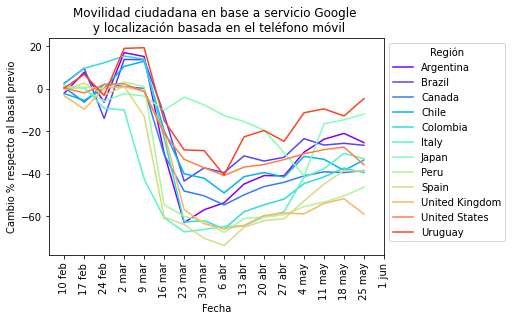

In [41]:
colors = cm.rainbow(np.linspace(0, 1, 13))
mundo_grouped.workplaces.mean().unstack().T.plot(color= colors).legend(bbox_to_anchor=(1, 1), title= 'Región')
plt.xlabel('Fecha')
plt.ylabel('Cambio % respecto al basal previo')
plt.title('Movilidad ciudadana en base a servicio Google \n y localización basada en el teléfono móvil')
plt.xticks(range(7,24),
           ['10 feb', '17 feb', '24 feb', '2 mar',
            '9 mar', '16 mar', '23 mar', '30 mar', '6 abr',
            '13 abr', '20 abr', '27 abr', '4 may', '11 may',
            '18 may', '25 may', '1 jun', '8 jun'],
           rotation='vertical')


Comienzo a describir la BD para ver que resultados puedo sacar

In [13]:
chile.columns

Index(['country_region_code', 'country_region', 'sub_region_1', 'sub_region_2',
       'date', 'retail_and_recreation', 'grocery_and_pharmacy', 'parks',
       'transit_stations', 'workplaces', 'residential'],
      dtype='object')

In [14]:
# Creo un objeto 'agrupado'
agrupado = chile.groupby(['sub_region_1',chile.date.dt.week])
agrupado.mean().unstack()

retail_and_recreation                        \
date                                                 7          8          9    
sub_region_1                                                                    
Arica y Parinacota                                 -2.0  -0.285714   2.142857   
Antofagasta                                         2.0  -1.571429   6.428571   
Tarapacá                                            4.0   1.000000   1.142857   
Atacama                                             3.0  -1.857143   1.142857   
Coquimbo                                           22.5  16.142857   3.428571   
Valparaíso                                         10.0   8.285714   2.000000   
Santiago Metropolitan Region                       -8.0  -9.000000   3.000000   
O'Higgins                                           4.0   1.714286   0.857143   
Maule                                               6.0   2.285714   2.142857   
Ñuble                                               8.0   4.714286   2.714286   
Bio Bio                                             4.0  -0.571429   3.142857   
Araucania                                          17.0   9.000000   2.000000   
Los Ríos                                           27.0  22.285714  16.714286   
Los Lagos                                          14.5   9.285714   5.571429   
Aysén                                               1.5   1.714286  -0.285714   
Magallanes and Chilean Antarctica                  -2.0  -2.571429   2.142857   

                                                                               \
date                                      10         11         12         13   
sub_region_1                                                                    
Arica y Parinacota                  4.714286  -6.857143 -43.000000 -61.571429   
Antofagasta                         8.285714   0.714286 -38.857143 -56.571429   
Tarapacá                            0.571429  -9.571429 -40.714286 -65.857143   
Atacama                             6.000000  -4.428571 -40.285714 -54.428571   
Coquimbo                          -12.000000 -19.142857 -54.571429 -71.428571   
Valparaíso                         -8.000000 -16.142857 -52.142857 -68.142857   
Santiago Metropolitan Region        8.142857   0.571429 -45.285714 -65.571429   
O'Higgins                           2.714286  -4.285714 -42.285714 -59.142857   
Maule                               0.428571  -5.428571 -43.428571 -59.428571   
Ñuble                               3.571429  -4.000000 -50.428571 -69.142857   
Bio Bio                             3.285714  -3.714286 -49.142857 -68.285714   
Araucania                          -4.285714 -11.857143 -54.571429 -72.714286   
Los Ríos                           -6.571429 -15.571429 -53.857143 -70.428571   
Los Lagos                           2.000000  -8.142857 -48.428571 -65.857143   
Aysén                              -3.857143 -12.857143 -50.000000 -64.000000   
Magallanes and Chilean Antarctica   4.571429  -3.571429 -52.142857 -68.571429   

                                                                    ...  \
date                                      14         15         16  ...   
sub_region_1                                                        ...   
Arica y Parinacota                -56.428571 -64.142857 -66.428571  ...   
Antofagasta                       -50.428571 -55.857143 -51.857143  ...   
Tarapacá                          -60.285714 -66.571429 -62.714286  ...   
Atacama                           -47.857143 -56.285714 -50.428571  ...   
Coquimbo                          -66.428571 -71.428571 -66.571429  ...   
Valparaíso                        -63.428571 -67.571429 -63.714286  ...   
Santiago Metropolitan Region      -65.571429 -69.571429 -63.428571  ...   
O'Higgins                         -53.142857 -57.571429 -51.428571  ...   
Maule                             -54.571429 -60.285714 -54.571429  ...   
Ñuble                             -73.142857 -76.14285

Calculo la varianza de cada semana según cada indicador

In [15]:

varianza = dict()
for var in indicadores:
    varianza[str(var)] = agrupado[var].mean().groupby(['date']).std()
# varianza de la varianza
pd.DataFrame.from_dict(varianza).std()
# mediana de la varianza
pd.DataFrame.from_dict(varianza).median()

retail_and_recreation    1.715871
grocery_and_pharmacy     1.908575
parks                    2.813761
transit_stations         2.314542
workplaces               2.876361
residential              1.358679
dtype: float64

retail_and_recreation    8.285536
grocery_and_pharmacy     7.916302
parks                    8.922996
transit_stations         9.262115
workplaces               9.501539
residential              2.799263
dtype: float64

In [26]:
agrupado.workplaces.mean()

sub_region_1                       date
Arica y Parinacota                 7       -3.500000
                                   8       -5.142857
                                   9       -0.857143
                                   10      10.285714
                                   11      13.857143
                                             ...    
Magallanes and Chilean Antarctica  18     -53.428571
                                   19     -42.857143
                                   20     -33.857143
                                   21     -37.142857
                                   22     -28.600000
Name: workplaces, Length: 256, dtype: float64

Text(0.5, 0, 'Fecha')

Text(0, 0.5, 'Cambio % respecto al basal previo')

Text(0.5, 1.0, 'Movilidad ciudadana en base a servicio Google \n y localización basada en el teléfono móvil')

([<matplotlib.axis.XTick at 0x7f0b2301bf60>,
 [Text(0, 0, '3 feb'),
  Text(0, 0, '10 feb'),
  Text(0, 0, '17 feb'),
  Text(0, 0, '24 feb'),
  Text(0, 0, '2 mar'),
  Text(0, 0, '9 mar'),
  Text(0, 0, '16 mar'),
  Text(0, 0, '23 mar'),
  Text(0, 0, '30 mar'),
  Text(0, 0, '6 abr'),
  Text(0, 0, '13 abr'),
  Text(0, 0, '20 abr'),
  Text(0, 0, '27 abr'),
  Text(0, 0, '4 may'),
  Text(0, 0, '11 may')])

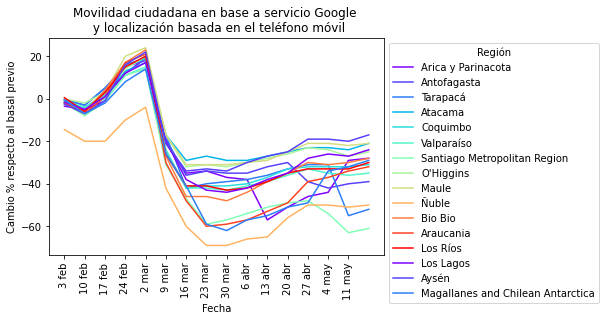

In [16]:
# lo grafico 
colors = cm.rainbow(np.linspace(0, 1, 13))
agrupado.workplaces.median().unstack().T.plot(color=colors).legend(bbox_to_anchor=(1, 1), title= 'Región')
plt.xlabel('Fecha')
plt.ylabel('Cambio % respecto al basal previo')
plt.title('Movilidad ciudadana en base a servicio Google \n y localización basada en el teléfono móvil')
plt.xticks(range(7,22),
           ['3 feb', '10 feb', '17 feb', '24 feb', '2 mar',
            '9 mar', '16 mar', '23 mar', '30 mar', '6 abr',
            '13 abr', '20 abr', '27 abr', '4 may', '11 may',
            '18 may', '25 may', '1 jun'],
           rotation='vertical')

In [17]:
#graficador movilidad
def graf_movilidad(db, variables, fecha_inicio, leyenda=None):
    variables
    f_fin = dt.datetime.now()
    f_inicio = dt.datetime(2020,2,16)
    
    # Grafico
    fig, ax = plt.subplots()
    dum.plot(x='date',
              y=variables,
              ax=ax)
    plt.xlabel('Fecha')
    plt.ylabel('Cambio % respecto al basal previo')
    plt.title('Movilidad ciudadana en base a servicio Google \n y localización GPS del celular')
    plt.text(f_inicio, -0,
             'Dr E Céspedes \nSAMU Viña del Mar',
             fontsize=10,
             color='gray',
             alpha=0.5)
    plt.legend(leyenda)

Valparaíso


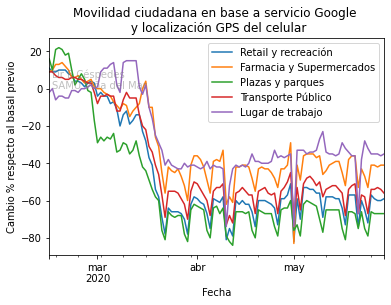

In [18]:
# Graficador movilidad en chile
dum = BD.loc[
    (BD.country_region == 'Chile') &
     (BD.sub_region_1 == 'Valparaíso')
            ]

for region in dum.sub_region_1.unique():
    print(region)
graf_movilidad(dum,
           variables = ['retail_and_recreation', 'grocery_and_pharmacy', 'parks',	'transit_stations', 'workplaces'],
           leyenda   = ['Retail y recreación', 'Farmacia y Supermercados', 'Plazas y parques',	'Transporte Público', 'Lugar de trabajo'],
           fecha_inicio=dt.datetime(2020,4,16)
          )

In [19]:
dum.sub_region_1.unique()

array(['Valparaíso'], dtype=object)

In [20]:
cols = ['retail_and_recreation', 'grocery_and_pharmacy', 'parks',	'transit_stations', 'workplaces']

f_inicio = dt.datetime(2020,4,1)
valpo = valpo.loc[valpo.date>f_inicio]
indicadores = valpo.groupby([valpo.date.dt.day_name()])
indicadores.retail_and_recreation.agg(['mean','std'])


,mean,std
date,,
Friday,-64.777778,9.679589
Monday,-57.875000,2.295181
Saturday,-64.500000,5.631544
Sunday,-73.125000,3.090885
Thursday,-60.000000,6.363961
Tuesday,-58.500000,2.672612
Wednesday,-58.375000,2.326094


In [21]:
valpo.date.dt.day_name()


24750     Thursday
24751       Friday
24752     Saturday
24753       Sunday
24754       Monday
24755      Tuesday
24756    Wednesday
24757     Thursday
24758       Friday
24759     Saturday
24760       Sunday
24761       Monday
24762      Tuesday
24763    Wednesday
24764     Thursday
24765       Friday
24766     Saturday
24767       Sunday
24768       Monday
24769      Tuesday
24770    Wednesday
24771     Thursday
24772       Friday
24773     Saturday
24774       Sunday
24775       Monday
24776      Tuesday
24777    Wednesday
24778     Thursday
24779       Friday
24780     Saturday
24781       Sunday
24782       Monday
24783      Tuesday
24784    Wednesday
24785     Thursday
24786       Friday
24787     Saturday
24788       Sunday
24789       Monday
24790      Tuesday
24791    Wednesday
24792     Thursday
24793       Friday
24794     Saturday
24795       Sunday
24796       Monday
24797      Tuesday
24798    Wednesday
24799     Thursday
24800       Friday
24801     Saturday
24802       